<a href="https://colab.research.google.com/github/Tristant2005/Cheminformatics/blob/main/Basics_of_Molecular_Fingerprints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basics of Molecular Fingerprints**

Formal guide here
https://www.youtube.com/watch?v=E4GR-cEsdKw

In [1]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 32.4 MB/s eta 0:00:00


In [2]:
import requests

import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem, PandasTools, MACCSkeys
from rdkit import DataStructs
from rdkit.DataStructs import TanimotoSimilarity

from collections import Counter
pd.set_option('display.max_columns', None)

warnings.filterwarnings("ignore")


Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [6]:
from google.colab import files
files.upload()

Saving alcohols.xlsx to alcohols.xlsx


In [77]:
df = pd.read_excel('alcohols.xlsx')
df.head()

,Name,Smiles
0,2-phenoxyethanol,OCCOC1=CC=CC=C1
1,2-bromoethanol,BrCCO
2,2-fluoroethanol,FCCO
3,methanol,CO
4,benzylalcohol,OCC1=CC=CC=C1


In [8]:
# Creating molecular object from Smiles
PandasTools.AddMoleculeColumnToFrame(df,'Smiles','mol')
df.head()

Failed to patch pandas - unable to change molecule rendering


,Name,Smiles,mol
0,2-phenoxyethanol,OCCOC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7b7c39cb5d20>
1,2-bromoethanol,BrCCO,<rdkit.Chem.rdchem.Mol object at 0x7b7c39cb5d90>
2,2-fluoroethanol,FCCO,<rdkit.Chem.rdchem.Mol object at 0x7b7c39cb5e70>
3,methanol,CO,<rdkit.Chem.rdchem.Mol object at 0x7b7c39cb5e00>
4,benzylalcohol,OCC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7b7c39cb5ee0>


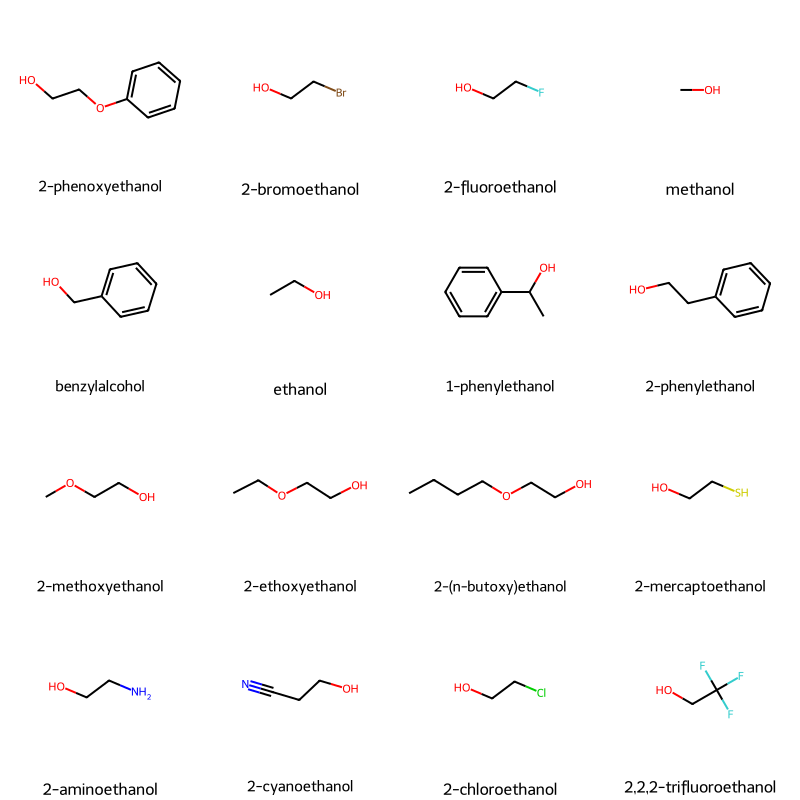

In [9]:
#legends = [f"{x}\n{y}" for x, y in zip(df['Name'][:16], df['Smiles'][:16])]

#print first 16 molecules in dataset
Draw.MolsToGridImage(df['mol'][:16],molsPerRow=4,subImgSize=(200,200),legends=[x for x in df['Name'][:16]])
# Draw.MolsToGridImage(df['mol'][:16],molsPerRow=4,subImgSize=(200,200),legends=[x for x in df['Smiles'][:16]])

# MACCS-Keys

Molecular ACCess System Keys -> A set of 166 pre-defined structural keys

(Fragmentation and hashing step)

A dictionary to all features and bits:
 https://github.com/rdkit/rdkit/blob/112fc3e4539af98bfa2893da05885fe9842a2df5/rdkit/Chem/MACCSkeys.py#L4

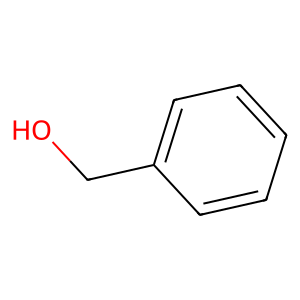

In [40]:
# Grab a molecule from the dataset
mol_index = 4
Draw.MolToImage(df['mol'][mol_index])
# df['mol'][mol_index]

In [37]:
#use MACCSkeys package to generate encoded form of molecule
maccs_bv = MACCSkeys.GenMACCSKeys(df['mol'][mol_index]) # (bv = Bit vector)

# convert bit vector to numpy array
maccs_np = np.array(maccs_bv)
maccs_np

# Note: Rdkit sputs 167 values in this list, even though there are only 166 features
#       Basically Bit zero is always set to false and not used.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [38]:
#convert to data frame for better visualization
maccs = pd.DataFrame(maccs_np).T
# maccs

# count the number of bits
print(Counter(maccs_np))

# print the position of On bits
print(f'The bits are on at position {list(maccs_bv.GetOnBits())}')

Counter({0: 157, 1: 10})
The bits are on at position [82, 109, 139, 153, 155, 157, 162, 163, 164, 165]


# **Morgan Fingerprint**
(Circular Fingerprint)

In [72]:
bit_info = {}
mf_bv = AllChem.GetMorganFingerprintAsBitVect(df['mol'][mol_index], radius=2, nBits = 2048, bitInfo=bit_info)
mf_bv

In [73]:
# convert the bit vector into np array
mf_np = np.array(mf_bv)
# count the number of bits
print(Counter(mf_bv))
indexes_of_on_bits = list(mf_bv.GetOnBits())
print(f'The bits are on at position {indexes_of_on_bits}')

Counter({0: 2034, 1: 14})
The bits are on at position [58, 80, 222, 389, 807, 837, 1066, 1073, 1088, 1199, 1380, 1750, 1754, 1873]


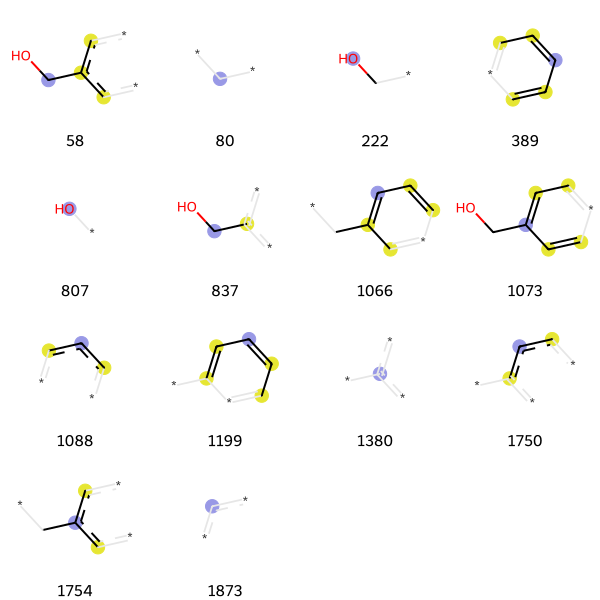

In [74]:
tpls = [(df['mol'][mol_index], x, bit_info) for x in mf_bv.GetOnBits()]
Draw.DrawMorganBits(tpls,molsPerRow=4,legends=[str(x) for x in mf_bv.GetOnBits()])

In [82]:
bit_id = 807
# Draw.DrawMorganBit(mol = df['mol'][mol_index], bitId=bit_id, bitInfo=bit_info)

# **Satitoxin Experiment**

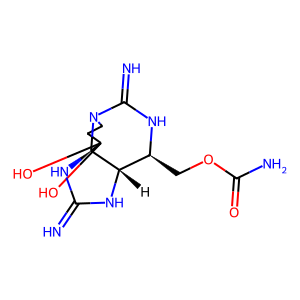

In [83]:
# Define molecule
saxitoxin = "N=C1N[C@H]2[C@H](COC(N)=O)NC(=N)N3CCC(O)(O)[C@]23N1"

# Turn saxitoxin into a Rdkit.Mol object
saxitoxin = Chem.MolFromSmiles(saxitoxin)
print(saxitoxin)
Draw.MolToImage(saxitoxin)

In [87]:
# Encode molecule
maccs_bv = MACCSkeys.GenMACCSKeys(saxitoxin)

# convert bit vector to numpy array
maccs_np = np.array(maccs_bv)
print(maccs_np)

# # convert to data frame for better visualization
# maccs = pd.DataFrame(maccs_np).T

print(Counter(maccs_np))
# print(f'The bits are on at position {list(maccs_bv.GetOnBits())}')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1
 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0]
Counter({0: 105, 1: 62})


Counter({0: 1990, 1: 58})


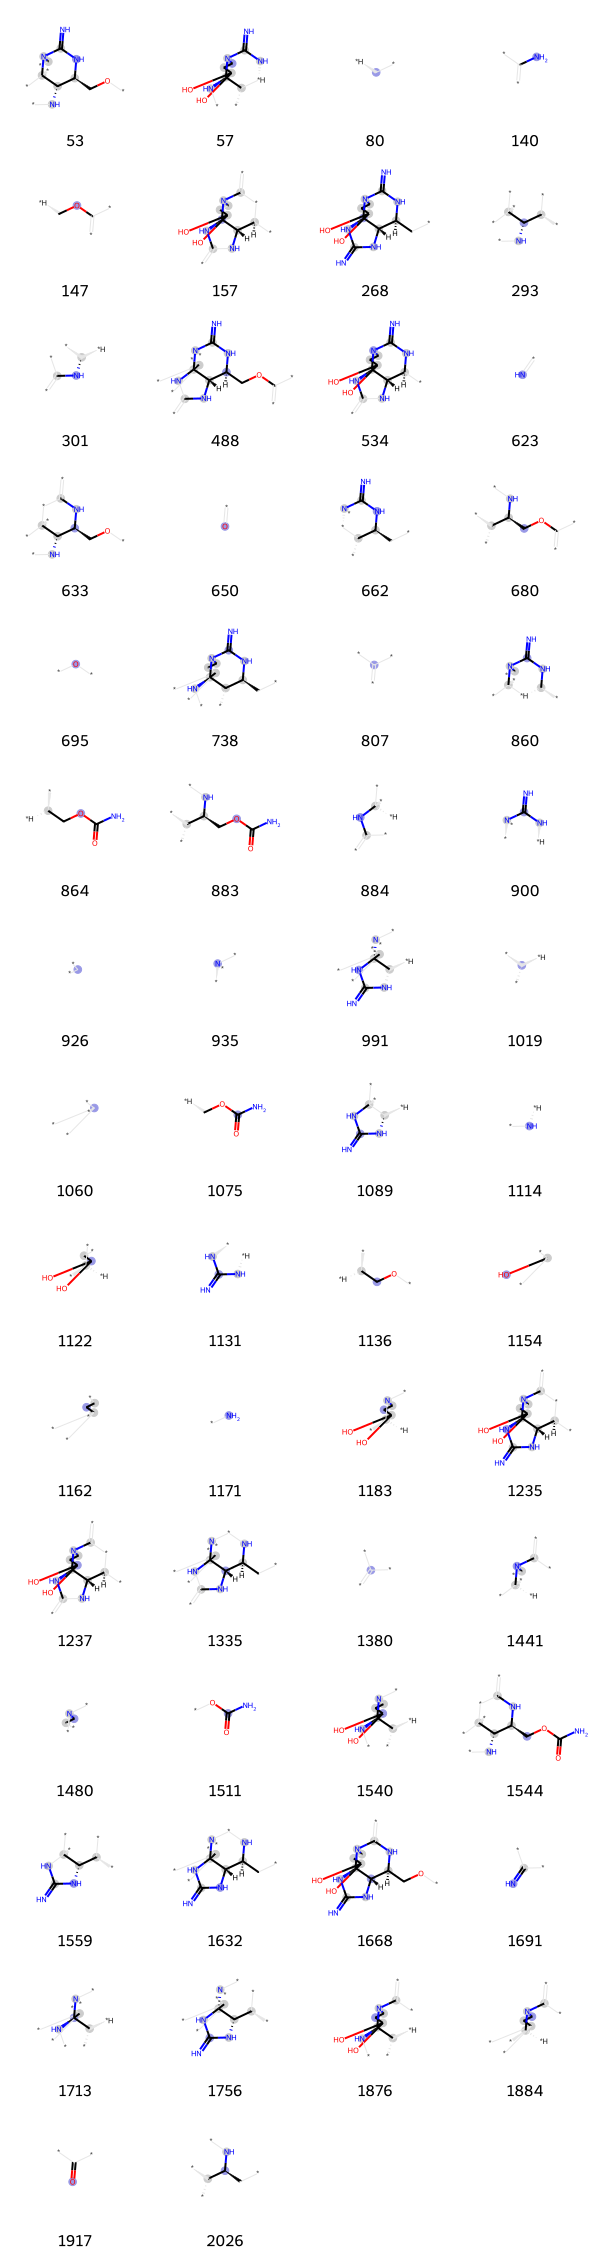

In [91]:
# Find Fingerprints
bit_info = {}
radius = 2
mf_bv = AllChem.GetMorganFingerprintAsBitVect(saxitoxin, radius=radius, nBits = 2048, bitInfo=bit_info)

# convert the bit vector into np array
mf_np = np.array(mf_bv)
# count the number of bits
print(Counter(mf_bv))
indexes_of_on_bits = list(mf_bv.GetOnBits())
# print(f'The bits are on at position {indexes_of_on_bits}')

tpls = [(saxitoxin, x, bit_info) for x in mf_bv.GetOnBits()]
Draw.DrawMorganBits(tpls,molsPerRow=4,legends=[str(x) for x in mf_bv.GetOnBits()])

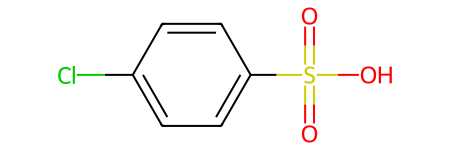

In [ ]:
smile = "OS(=O)(=O)C1=CC=C(Cl)C=C1"

benzodiazepine = "N1N=CC=CC2=CC=CC=C12"
alprazolam = "CC1=NN=C2CN=C(C3=CC=CC=C3)C3=C(C=CC(Cl)=C3)N12"
lysergicAcidDiethylamide = "[H][C@@]12CC3=CNC4=CC=CC(=C34)C1=C[C@H](CN2C)C(=O)N(CC)CC"
meprobamate = "CCCC(C)(COC(N)=O)COC(N)=O"

saxitoxin = "N=C1N[C@H]2[C@H](COC(N)=O)NC(=N)N3CCC(O)(O)[C@]23N1"


chemical = Chem.MolFromSmiles(smile)
chemical

In [ ]:
CACTUS = "https://cactus.nci.nih.gov/chemical/structure/{0}/{1}"

#takes smile string and turns it into a chemical name
def smiles_to_iupac(smiles):
    try:
      rep = "iupac_name"
      url = CACTUS.format(smiles, rep)
      response = requests.get(url)
      response.raise_for_status()
      return response.text
    except:
      return "smile not found"


print(smiles_to_iupac(smile))
#print(smiles_to_iupac('CC(=O)OC1=CC=CC=C1C(=O)O'))

4-CHLOROBENZENESULFONIC ACID
